<a href="https://colab.research.google.com/github/bileldhambri/DS-Project-Music-Classification/blob/main/Binary_classification_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import missingno as msno
import seaborn as sns
import numpy as np

In [ ]:
Data=pd.read_csv('./music_genre.csv')

In [ ]:
print(Data.shape)
Data.head()

(50005, 18)


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

### Les variables qualitatives

In [ ]:
for col in Data.select_dtypes('object'):
    print(f'{col:-<50}{Data[col].unique()}')

artist_name---------------------------------------['Röyksopp' 'Thievery Corporation' 'Dillon Francis' ... 'Darshan Raval'
 'Powers Pleasant' 'Millonario']
track_name----------------------------------------["Röyksopp's Night Out" 'The Shining Path' 'Hurricane' ...
 'Drama (feat. Drake)' "Lovin' Me (feat. Smiggz)" 'Hip Hop Hooray']
key-----------------------------------------------['A#' 'D' 'G#' 'C#' 'F#' 'B' 'G' 'F' 'A' 'C' 'E' 'D#' nan]
mode----------------------------------------------['Minor' 'Major' nan]
tempo---------------------------------------------['100.889' '115.00200000000001' '127.994' ... '112.97' '167.655'
 '99.20100000000001']
obtained_date-------------------------------------['4-Apr' '3-Apr' '5-Apr' '1-Apr' nan '0/4']
music_genre---------------------------------------['Electronic' 'Anime' nan 'Jazz' 'Alternative' 'Country' 'Rap' 'Blues'
 'Rock' 'Classical' 'Hip-Hop']


### Les valeurs manquantes

In [ ]:
def count_percent(data):
  df_cols = pd.DataFrame({'Count Missing': data.isnull().sum(),
                        'Percent Missing': data.isnull().sum()*100/data.shape[0]})
  return df_cols

count_percent(Data)

,Count Missing,Percent Missing
instance_id,5,0.009999
artist_name,5,0.009999
track_name,5,0.009999
popularity,5,0.009999
acousticness,5,0.009999
danceability,5,0.009999
duration_ms,5,0.009999
energy,5,0.009999
instrumentalness,5,0.009999
key,5,0.009999


<Axes: >

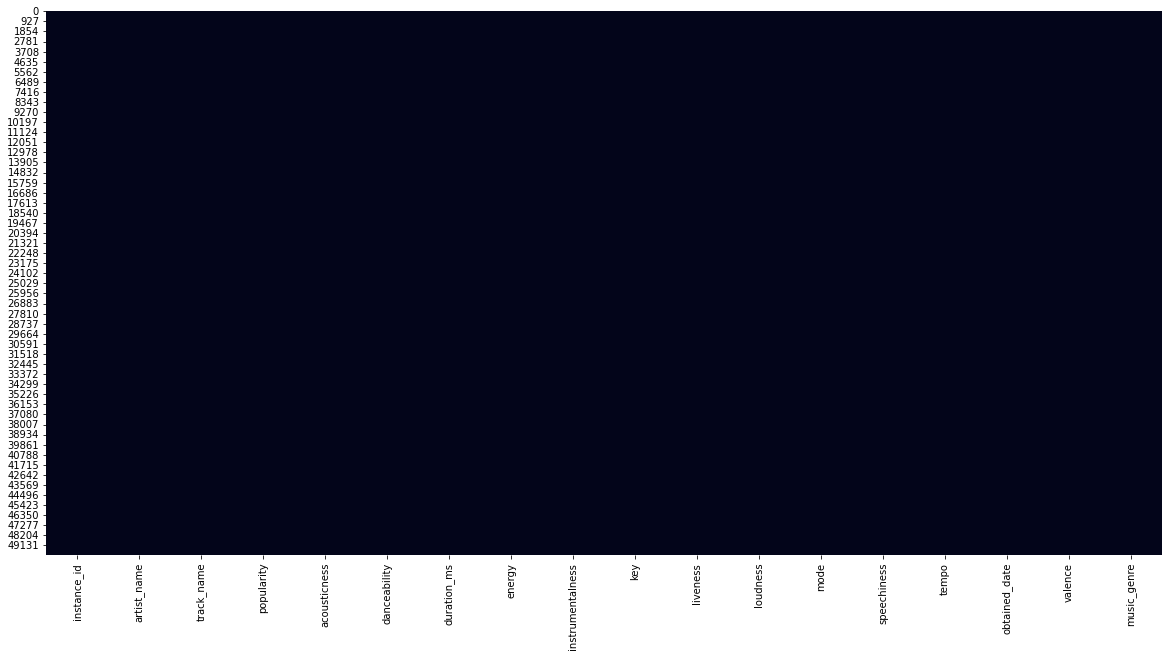

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(Data.isna(),cbar=False)

In [ ]:
m_cols = count_percent(Data)
print(m_cols[m_cols['Count Missing']>0],'\n')

                  Count Missing  Percent Missing
instance_id                   5         0.009999
artist_name                   5         0.009999
track_name                    5         0.009999
popularity                    5         0.009999
acousticness                  5         0.009999
danceability                  5         0.009999
duration_ms                   5         0.009999
energy                        5         0.009999
instrumentalness              5         0.009999
key                           5         0.009999
liveness                      5         0.009999
loudness                      5         0.009999
mode                          5         0.009999
speechiness                   5         0.009999
tempo                         5         0.009999
obtained_date                 5         0.009999
valence                       5         0.009999
music_genre                   5         0.009999 



In [ ]:
Data[Data.isna().any(axis=1)]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
Data=Data.dropna()

In [ ]:
m_cols = count_percent(Data)
print(m_cols[m_cols['Count Missing']>0],'\n')

Empty DataFrame
Columns: [Count Missing, Percent Missing]
Index: [] 



### Exploratory Data Analysis EDA + Feature engineering

Text(0.5, 0, 'song title')

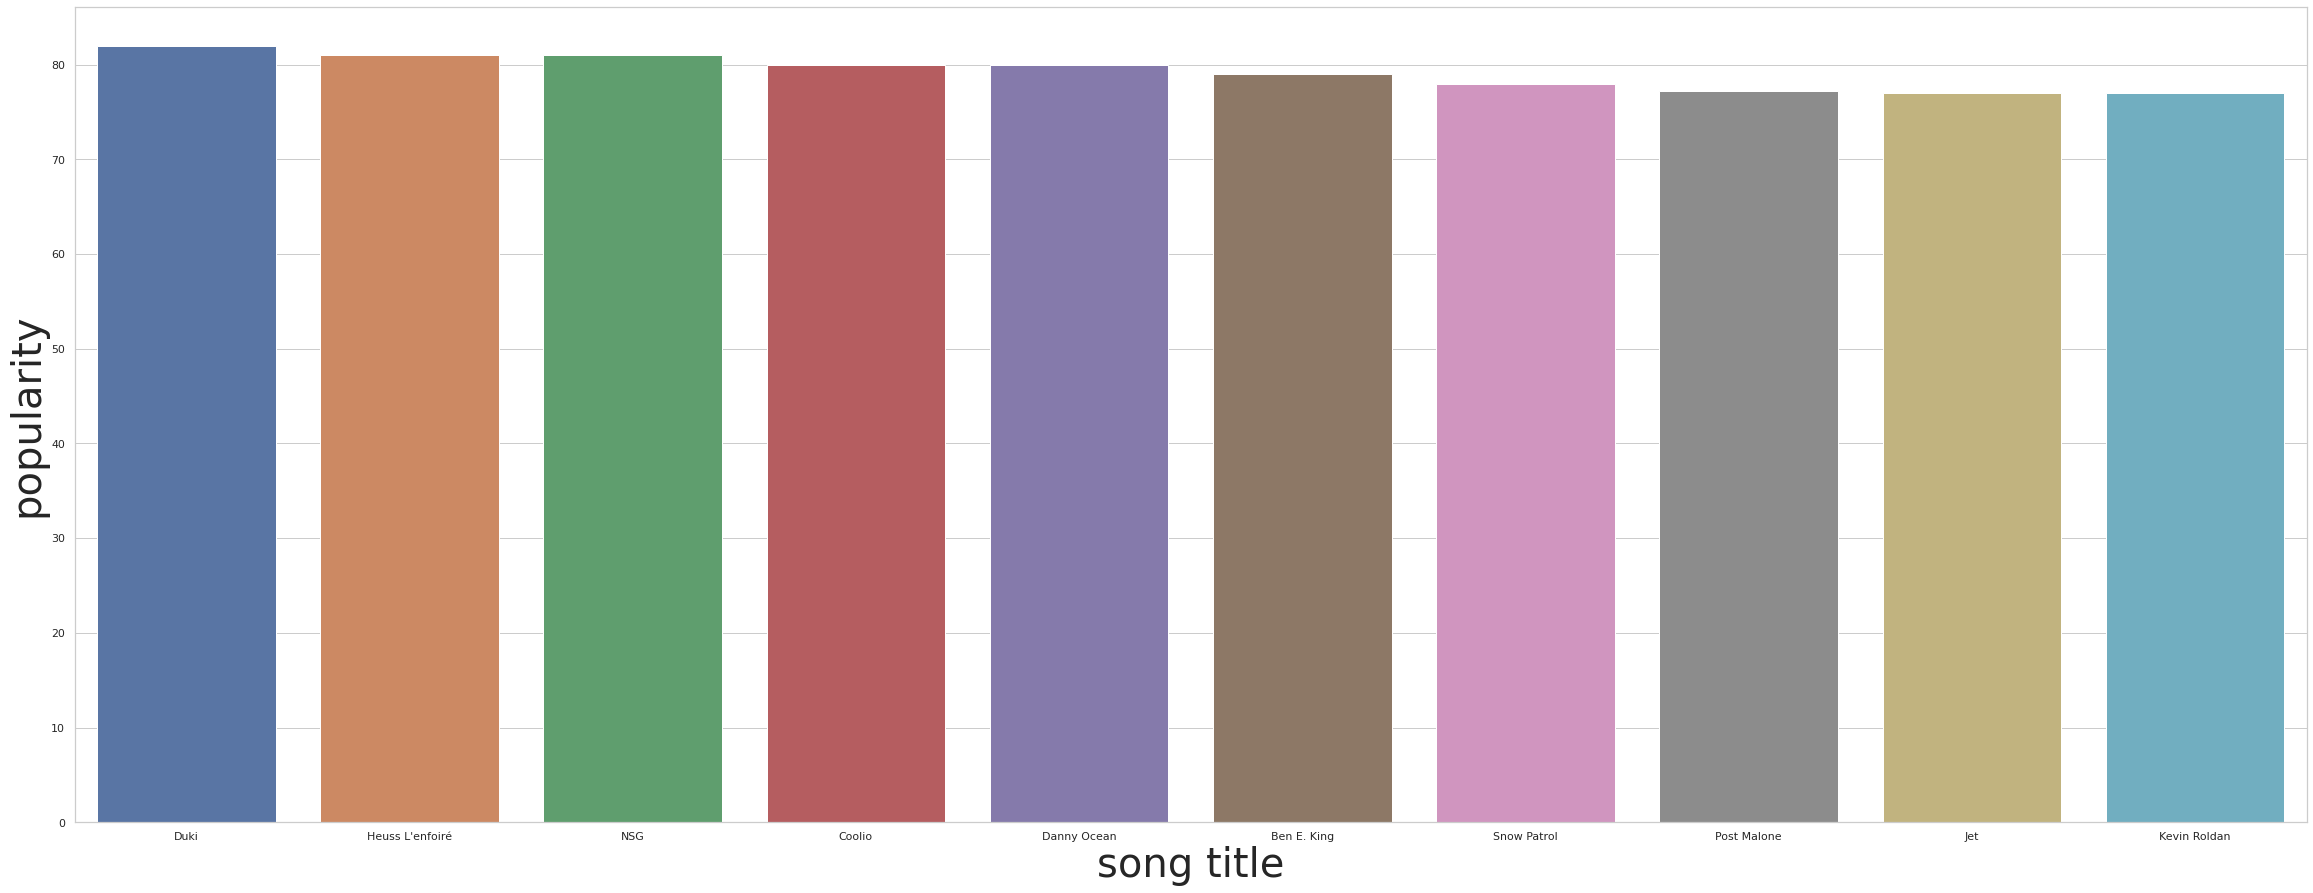

In [ ]:
plt.figure(figsize=(40, 15))
sns.set(style="whitegrid")

# group by the song's name and rank them base on their popularity
x = Data.groupby("artist_name")["popularity"].mean().sort_values(ascending=False).head(10)
axis = sns.barplot(x=x.index, y=x)

axis.set_ylabel('popularity', fontsize=40)
axis.set_xlabel('song title', fontsize=40)

Text(0.5, 0, 'artist')

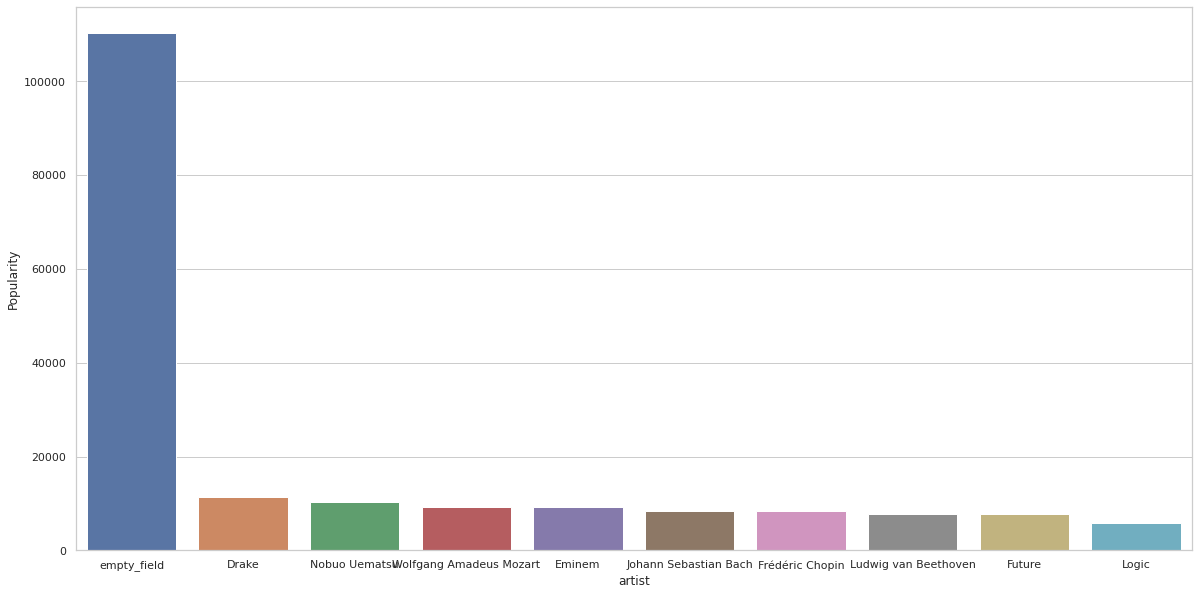

In [ ]:
from collections import Counter

artist_popularity_sum = Counter()

# since a song can have different artists, we add the popularity score to each 
# artists
for l in Data[["artist_name", "popularity"]].to_numpy():
    artist_list = [x.strip() for x in l[0].split(',')]
    for artist in artist_list:
        artist_popularity_sum[artist] += float(l[1])


top_10_artist = artist_popularity_sum.most_common(10)
xs = [a[0] for a in top_10_artist]
ys = [a[1] for a in top_10_artist]

plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")
axis = sns.barplot(x=xs, y=ys)

axis.set_ylabel('Popularity')
axis.set_xlabel('artist')

### Relationship between energy and popularity

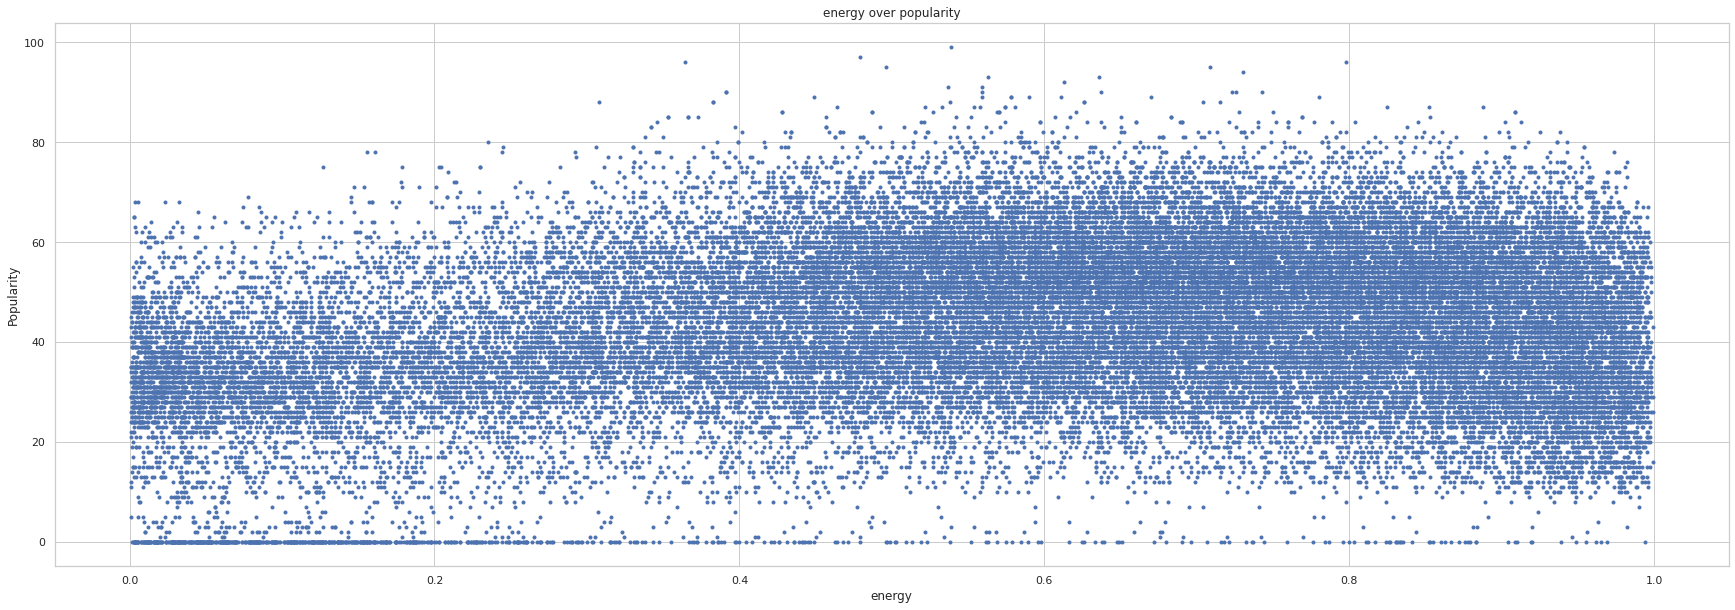

In [ ]:
plt.figure(figsize=(30, 10))

xs = Data["energy"].to_numpy()
ys = Data["popularity"].to_numpy()
plt.ylabel('Popularity')
plt.xlabel('energy')
plt.title("energy over popularity")
plt.plot(xs, ys, '.')
plt.show()

Text(0.5, 1.0, 'mean energy for song popularity')

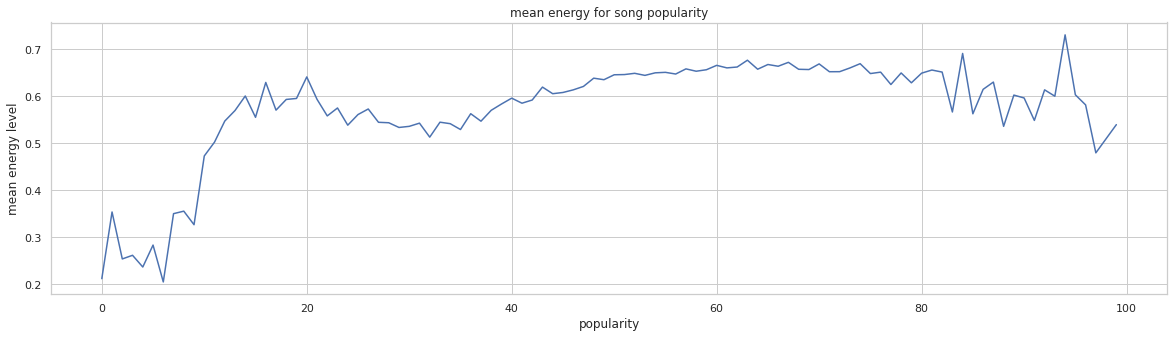

In [ ]:
plt.figure(figsize=(20, 5))
sns.set(style="whitegrid")

# group by the song's popularity and then get the mean energy
x =   Data.groupby("popularity")["energy"].mean()
axis = sns.lineplot(x=x.index, y=x)

axis.set_ylabel('mean energy level')
axis.set_xlabel('popularity')
axis.set_title("mean energy for song popularity")

### Relationship between livliness and popularity

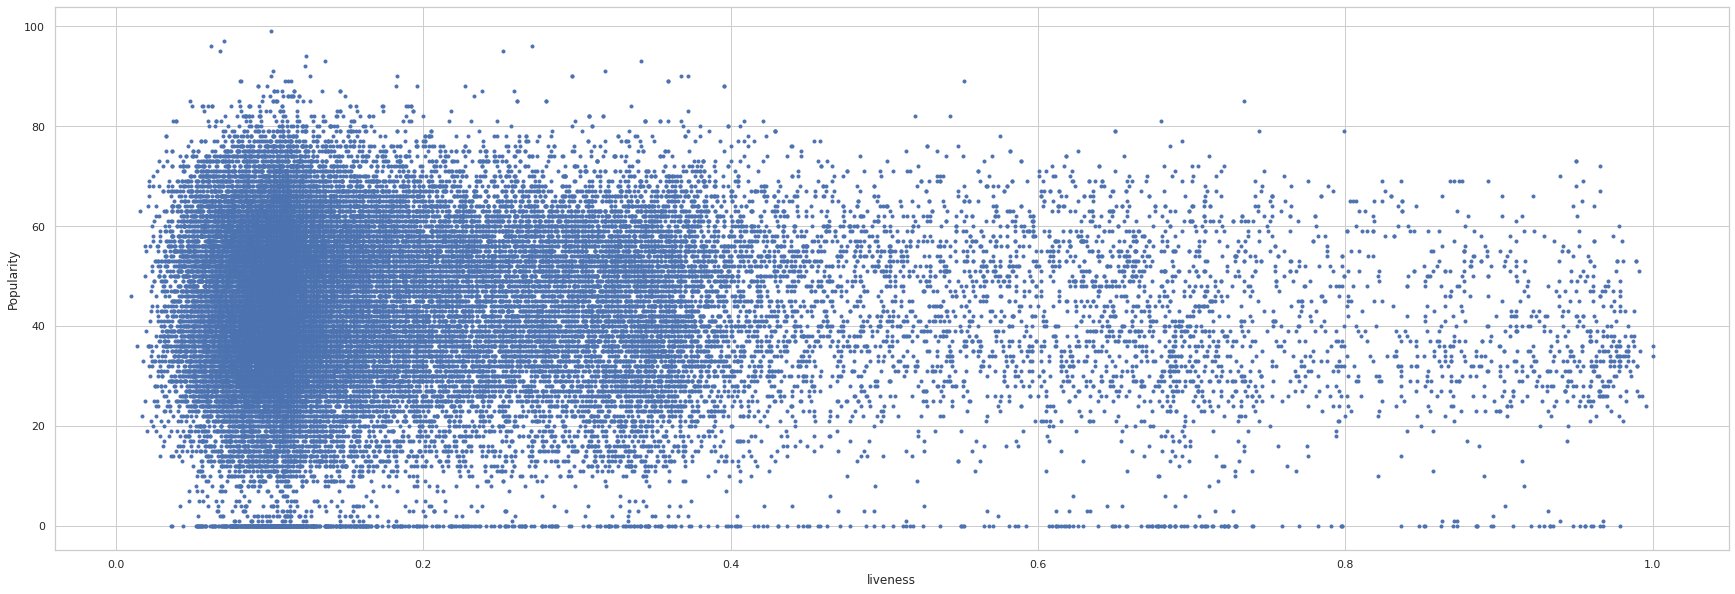

In [ ]:
plt.figure(figsize=(30, 10))

xs = Data["liveness"].to_numpy()
ys = Data["popularity"].to_numpy()
plt.ylabel('Popularity')
plt.xlabel('liveness')

plt.plot(xs, ys, '.')
plt.show()

Text(0.5, 1.0, 'mean livness for song popularity')

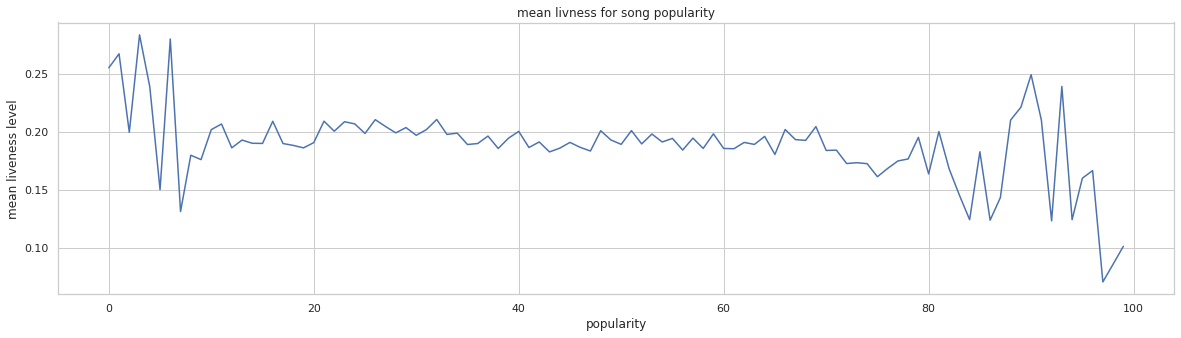

In [ ]:
plt.figure(figsize=(20, 5))
sns.set(style="whitegrid")

# group by the song's popularity and then get the mean energy
x = Data.groupby("popularity")["liveness"].mean()
axis = sns.lineplot(x=x.index, y=x)

axis.set_ylabel('mean liveness level')
axis.set_xlabel('popularity')
axis.set_title("mean livness for song popularity")

Text(0.5, 1.0, 'mean acousticness for song popularity')

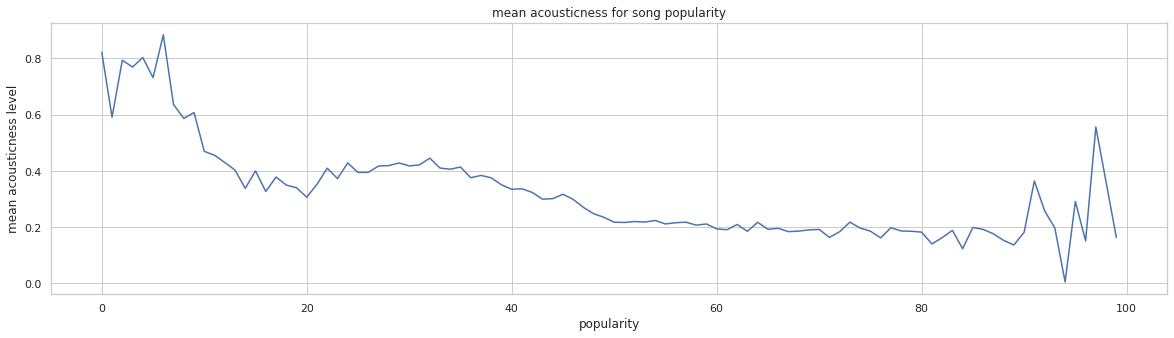

In [ ]:
plt.figure(figsize=(20, 5))
sns.set(style="whitegrid")

# group by the song's popularity and then get the mean energy
x = Data.groupby("popularity")["acousticness"].mean()
axis = sns.lineplot(x=x.index, y=x)

axis.set_ylabel('mean acousticness level')
axis.set_xlabel('popularity')
axis.set_title("mean acousticness for song popularity")

In [ ]:
Data['obtained_date'].nunique()

5

In [ ]:
Data.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


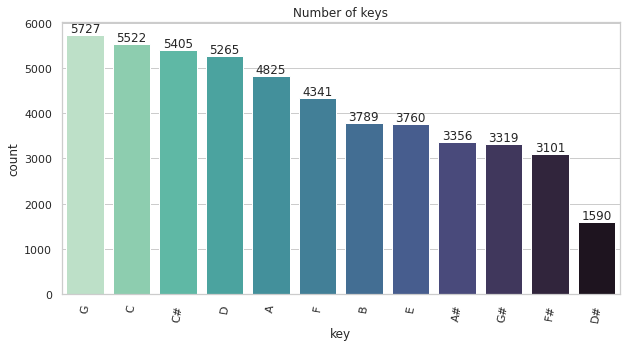

In [ ]:
fig, ax  = plt.subplots(figsize=(10,5))
ax=sns.countplot(x='key', data=Data, palette='mako_r', order = Data['key'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
ax.bar_label(ax.containers[0])
plt.title('Number of keys')
plt.show()

###  Variable "tempo"

In [ ]:
Data["tempo"].head(15)

0                100.889
1     115.00200000000001
2                127.994
3                128.014
4                145.036
5                      ?
6                149.995
7                120.008
8     149.94799999999998
9                139.933
10                57.528
11               178.543
12               128.043
13               154.745
14               139.911
Name: tempo, dtype: object

In [ ]:
Data[Data["tempo"]=="?"]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
5,89064.0,Axel Boman,Hello,47.0,0.00523,0.755,519468.0,0.731,0.854000,D,0.2160,-10.517,Minor,0.0412,?,4-Apr,0.6140,Electronic
32,25836.0,PEEKABOO,Arrival,45.0,0.02330,0.729,274286.0,0.869,0.585000,F,0.0944,-7.569,Minor,0.1290,?,4-Apr,0.1380,Electronic
35,27048.0,Fabian Mazur,If U Wanted To,33.0,0.10800,0.493,-1.0,0.682,0.000000,A,0.1960,-5.781,Minor,0.2870,?,4-Apr,0.2390,Electronic
36,55617.0,Wax Tailor,The Games You Play,45.0,0.04780,0.646,253333.0,0.649,0.002520,G,0.3530,-5.259,Major,0.1170,?,4-Apr,0.7270,Electronic
39,69685.0,Dahu,Vessel,37.0,0.20300,0.769,429941.0,0.551,0.882000,A#,0.1090,-12.520,Minor,0.0408,?,4-Apr,0.0618,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49918,63058.0,Big Sean,Bigger Than Me,58.0,0.29600,0.379,292520.0,0.644,0.000000,A#,0.3130,-7.933,Minor,0.1120,?,5-Apr,0.1440,Hip-Hop
49964,53387.0,Millonario,Rayas de Patrón,59.0,0.08470,0.929,215200.0,0.737,0.000000,G#,0.8610,-6.424,Major,0.1020,?,4-Apr,0.8860,Hip-Hop
49967,76585.0,MadeinTYO,I Want (feat. 2 Chainz),62.0,0.17900,0.860,233293.0,0.625,0.000136,D,0.3000,-6.922,Major,0.1050,?,4-Apr,0.2210,Hip-Hop
49976,79654.0,Big Sean,Sunday Morning Jetpack,52.0,0.70000,0.462,225067.0,0.741,0.000000,A#,0.3400,-8.008,Minor,0.1620,?,4-Apr,0.5890,Hip-Hop


In [ ]:
pd.to_numeric(Data["tempo"], errors='coerce').mean()

119.95296059529099

In [ ]:
Data["tempo"]=Data["tempo"].replace('?',pd.to_numeric(Data["tempo"], errors='coerce').mean())
Data["tempo"]=Data["tempo"].astype(float)
print(Data["tempo"])
Data.info()

0        100.889
1        115.002
2        127.994
3        128.014
4        145.036
          ...   
50000     98.028
50001    122.043
50002    131.079
50003     75.886
50004     99.201
Name: tempo, Length: 50000, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12

In [ ]:
Data[Data['tempo']==119.95296059529068]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre


Text(0, 0.5, 'BPM')

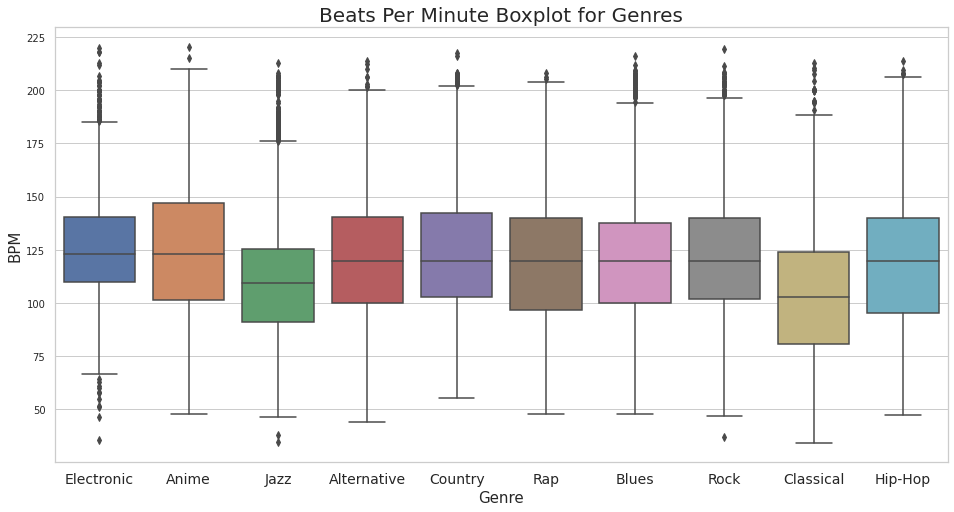

In [ ]:
x = Data[["music_genre", "tempo"]]

fig, ax = plt.subplots(figsize=(16, 8));
sns.boxplot(x = "music_genre", y = "tempo", data = x);

plt.title('Beats Per Minute Boxplot for Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
#plt.savefig("BPM_Boxplot.png")

<Axes: >

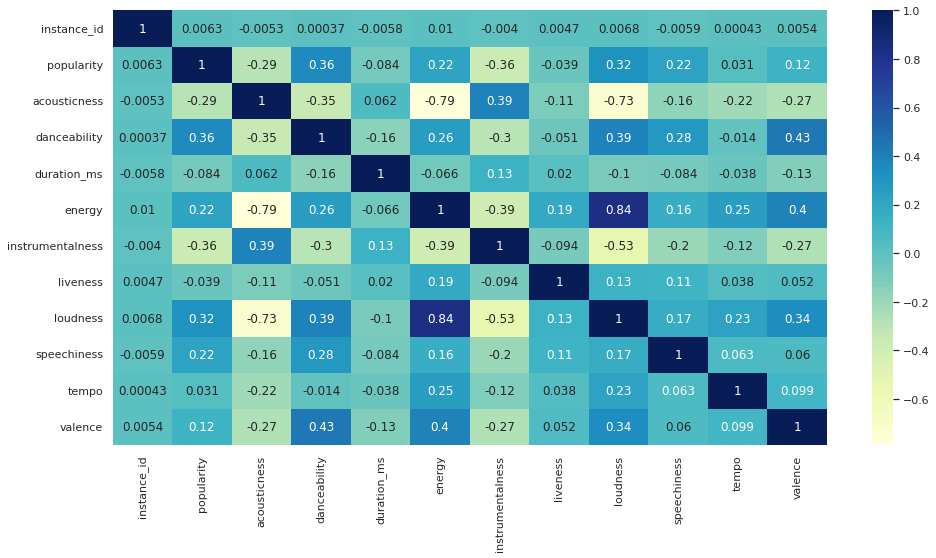

In [ ]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
corr = Data.corr()
sns.heatmap(corr,annot=True, cmap="YlGnBu")


In [ ]:
Data.drop("instance_id",axis=1,inplace=True)
Data.drop("artist_name",axis=1,inplace=True)
Data.drop("track_name",axis=1,inplace=True)
Data.drop("obtained_date",axis=1,inplace=True)

In [ ]:
Data

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,59.0,0.03340,0.913,-1.0,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.028,0.330,Hip-Hop
50001,72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.043,0.113,Hip-Hop
50002,51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,0.395,Hip-Hop
50003,65.0,0.08310,0.782,262773.0,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,75.886,0.354,Hip-Hop


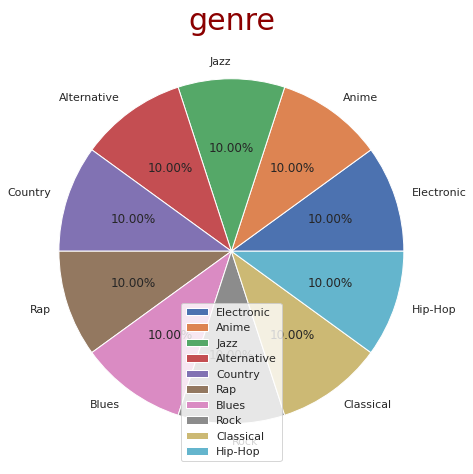

In [ ]:
import seaborn as sns
genre = Data["music_genre"].value_counts()


plt.figure(figsize=(17, 17))
plt.subplot(1,2,2)
plt.pie(genre.values, labels=genre.index, autopct='%1.2f%%')
plt.title('genre',color = 'darkred',fontsize = 30)
plt.legend()
plt.show()

In [ ]:
Data['is_Rock']=Data['music_genre'].apply(lambda x: 1 if x == 'Rock' or x == 'Hip-Hop' or x=='Rap'  else 0)
Data

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre,is_Rock
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic,0
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,0.531,Electronic,0
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic,0
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic,0
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,59.0,0.03340,0.913,-1.0,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.028,0.330,Hip-Hop,1
50001,72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.043,0.113,Hip-Hop,1
50002,51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,0.395,Hip-Hop,1
50003,65.0,0.08310,0.782,262773.0,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,75.886,0.354,Hip-Hop,1


In [ ]:
for col in Data.select_dtypes('object'):
    print(f'{col:-<50}{Data[col].unique()}')

key-----------------------------------------------['A#' 'D' 'G#' 'C#' 'F#' 'B' 'G' 'F' 'A' 'C' 'E' 'D#']
mode----------------------------------------------['Minor' 'Major']
music_genre---------------------------------------['Electronic' 'Anime' 'Jazz' 'Alternative' 'Country' 'Rap' 'Blues' 'Rock'
 'Classical' 'Hip-Hop']


In [ ]:
Data["mode"]=Data["mode"].replace('Major',1)
Data["mode"]=Data["mode"].replace('Minor',0)
Data["mode"]=Data["mode"].astype(int)
print(Data["mode"])
Data.info()

0        0
1        0
2        1
3        1
4        1
        ..
50000    1
50001    1
50002    1
50003    0
50004    0
Name: mode, Length: 50000, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 50004
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        50000 non-null  float64
 1   acousticness      50000 non-null  float64
 2   danceability      50000 non-null  float64
 3   duration_ms       50000 non-null  float64
 4   energy            50000 non-null  float64
 5   instrumentalness  50000 non-null  float64
 6   key               50000 non-null  object 
 7   liveness          50000 non-null  float64
 8   loudness          50000 non-null  float64
 9   mode              50000 non-null  int64  
 10  speechiness       50000 non-null  float64
 11  tempo             50000 non-null  float64
 12  valence           50000 non-null  float64
 13  music_genre       50

In [ ]:
from sklearn.preprocessing import LabelEncoder

# assume your column of 12 objects is named 'category_column'
encoder = LabelEncoder()
Data['key'] = encoder.fit_transform(Data['key'])




In [ ]:
Data.drop("music_genre",axis=1,inplace=True)

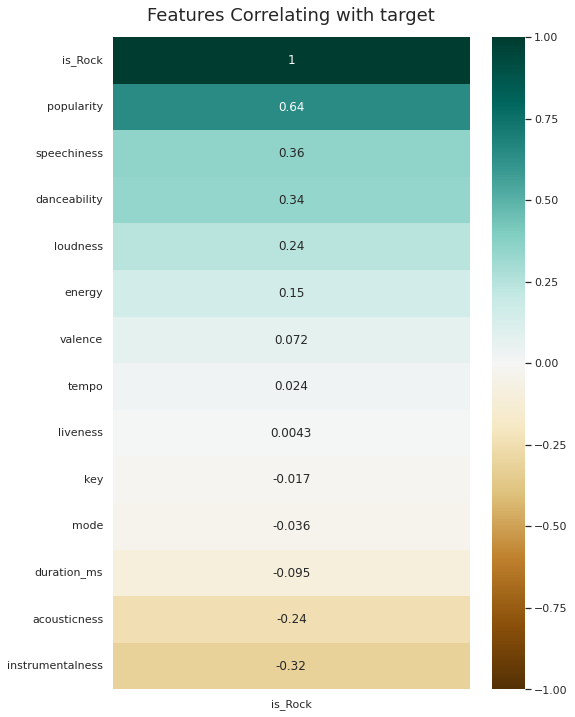

In [ ]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(Data.corr()[['is_Rock']].sort_values(by='is_Rock', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with target', fontdict={'fontsize':18}, pad=16);

## Smote

In [ ]:
Y = Data['is_Rock']
X = Data.drop(columns=['is_Rock'])

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X[:]=ss.fit_transform(X)
X

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,-1.108003,-0.883886,0.524878,-1.719534,1.289876,1.875809,-1.259526,-0.488113,0.638132,-1.339082,-0.185322,-0.655673,1.225073
1,-0.850633,-0.860390,0.356933,-0.023001,1.097101,2.361357,-0.102517,-0.432433,0.339248,-1.339082,-0.627258,-0.170280,0.302431
2,-1.043661,-0.888632,0.345737,-0.043830,0.586813,-0.521812,1.632996,2.104140,0.732892,0.746780,-0.582867,0.276558,-0.498812
3,-0.657606,-0.823184,1.207853,-0.422611,0.378918,-0.550300,-0.391769,-0.228269,0.752201,0.746780,1.434452,0.277246,-0.753752
4,-0.786291,-0.883974,0.446504,0.008676,-0.048212,2.235361,1.054492,-0.228269,0.465324,0.746780,-0.515787,0.862689,-0.539278
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,0.950954,-0.799746,1.985998,-1.719534,-0.097351,-0.558074,-0.391769,-0.463366,0.342655,0.746780,2.016466,-0.754072,-0.510952
50001,1.787405,-0.437640,0.843973,0.237874,-0.898692,-0.558074,-0.970273,-0.525234,-0.110376,0.746780,-0.380642,0.071883,-1.389081
50002,0.436214,-0.880107,0.754403,-0.246906,0.617052,-0.558074,-0.102517,-0.314884,0.598865,0.746780,0.517041,0.382662,-0.247918
50003,1.337008,-0.654142,1.252639,0.322687,-0.482901,-0.558074,1.343744,-0.543794,0.668150,-1.339082,-0.488166,-1.515609,-0.413831


In [ ]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
50000    1
50001    1
50002    1
50003    1
50004    1
Name: is_Rock, Length: 50000, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=9)

In [ ]:
d=0
for i in Y_train:
  if i==1:
    d=d+1
print(d)

11950


In [ ]:
import imblearn
smote = imblearn.over_sampling.SMOTE(sampling_strategy=0.7)
X_train, Y_train = smote.fit_resample(X_train, Y_train)


In [ ]:
d=0
for i in Y_train:
  if i==1:
    d=d+1
print(d)

19635


##Models

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import auc, accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.model_selection import learning_curve,cross_val_score

In [ ]:
def evaluation(model):
    model.fit(X_train,Y_train.values.ravel())    
    y_pred=model.predict(X_test)
    print(confusion_matrix(Y_test, y_pred))
    print(classification_report(Y_test, y_pred))
    cv_scores = cross_val_score(model,X_train, Y_train.values.ravel(),scoring='accuracy',cv=5)
    print("cross validation score=",cv_scores)
    print("ecart type cross validation=",np.std(cv_scores))
    N, train_score, val_score = learning_curve(model, X_train, Y_train.values.ravel(),
                                              cv=5, scoring='accuracy',train_sizes=np.linspace(0.1, 1,5))    
    plt.figure(figsize=(12, 8))
    plt.plot(N, 1-train_score.mean(axis=1), label='train loss')
    plt.plot(N, 1-val_score.mean(axis=1), label='validation loss')
    plt.legend()

def gridSearch(model,params):
    print("For",str(model).split("(")[0])
    grid = GridSearchCV(model, params,scoring='f1' ,cv=5)
    grid.fit(X_train,Y_train.values.ravel())
    print("\n")
    print("Best Parameters : ", grid.best_estimator_)
    print("\n")
    return(grid.best_estimator_)

In [ ]:
from sklearn.linear_model import LogisticRegression
params_logistic_regression={'penalty' : ['l1', 'l2'],'C' : np.logspace(-4, 4, 10)}
model=gridSearch(LogisticRegression(random_state=123,solver='liblinear', max_iter=5000),params_logistic_regression)

For LogisticRegression


Best Parameters :  LogisticRegression(C=0.046415888336127774, max_iter=5000, random_state=123,
                   solver='liblinear')




[[5330  681]
 [  79 1007]]
              precision    recall  f1-score   support

           0       0.99      0.89      0.93      6011
           1       0.60      0.93      0.73      1086

    accuracy                           0.89      7097
   macro avg       0.79      0.91      0.83      7097
weighted avg       0.93      0.89      0.90      7097

cross validation score= [0.89064607 0.89909269 0.90448749 0.90044139 0.90215792]
ecart type cross validation= 0.004717898830069733


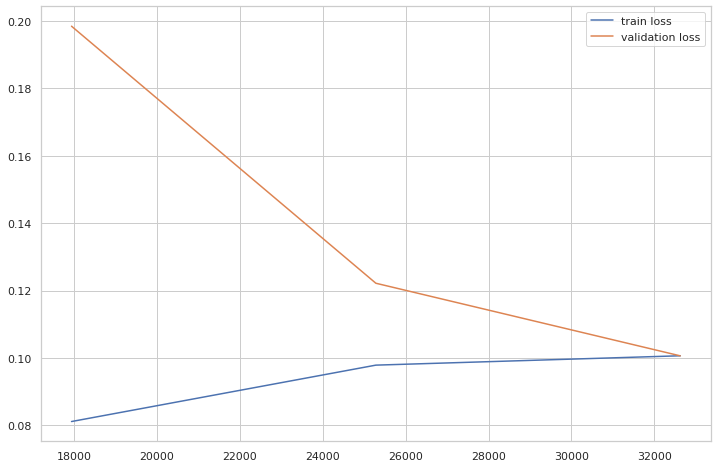

In [ ]:
evaluation(LogisticRegression(C=0.000774263682681127, max_iter=5000, random_state=123,
                   solver='liblinear'))

[[5360  651]
 [  89  997]]
              precision    recall  f1-score   support

           0       0.98      0.89      0.94      6011
           1       0.60      0.92      0.73      1086

    accuracy                           0.90      7097
   macro avg       0.79      0.90      0.83      7097
weighted avg       0.93      0.90      0.90      7097

cross validation score= [0.89714356 0.911231   0.92042668 0.91846493 0.92005885]
ecart type cross validation= 0.008812757424179819


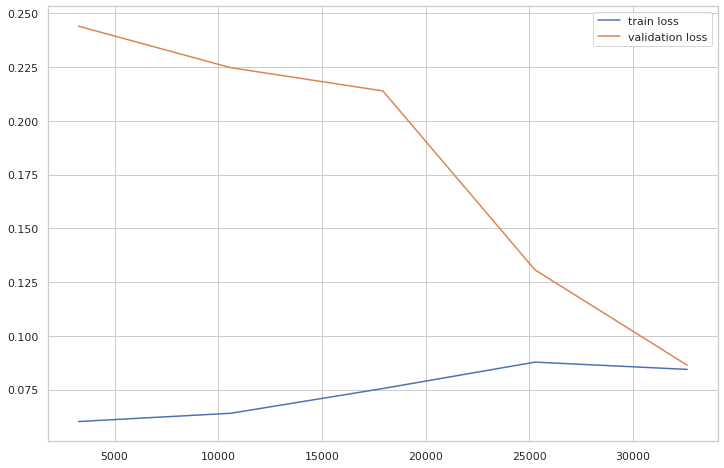

In [ ]:
from sklearn.ensemble import  RandomForestClassifier
evaluation(RandomForestClassifier(max_depth = 4, min_samples_leaf=2, n_estimators=166))

[[5796  215]
 [ 576  510]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      6011
           1       0.70      0.47      0.56      1086

    accuracy                           0.89      7097
   macro avg       0.81      0.72      0.75      7097
weighted avg       0.88      0.89      0.88      7097

cross validation score= [0.94924605 0.96051986 0.97376165 0.97412948 0.97523296]
ecart type cross validation= 0.010204268780780346


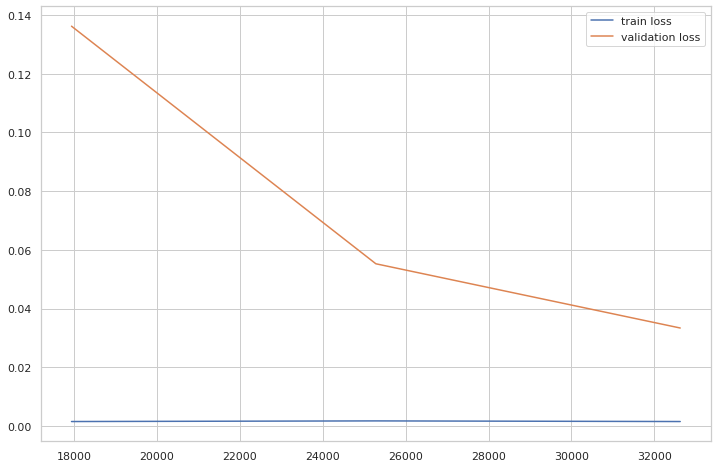

In [ ]:
from sklearn.svm import SVC
evaluation(SVC(C=10, gamma=1))

[[6168  782]
 [ 259 2791]]
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      6950
           1       0.78      0.92      0.84      3050

    accuracy                           0.90     10000
   macro avg       0.87      0.90      0.88     10000
weighted avg       0.91      0.90      0.90     10000

cross validation score= [0.89587921 0.89388697 0.89671805 0.91475307 0.91139771]
ecart type cross validation= 0.008726437557921712


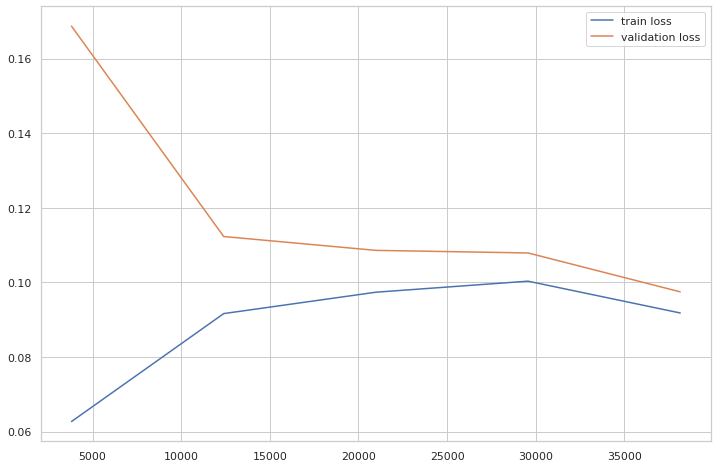

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
evaluation(GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, subsample=1.0))

[[6003  947]
 [ 190 2860]]
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      6950
           1       0.75      0.94      0.83      3050

    accuracy                           0.89     10000
   macro avg       0.86      0.90      0.87     10000
weighted avg       0.90      0.89      0.89     10000

cross validation score= [0.88927336 0.88864423 0.89158016 0.90133166 0.90133166]
ecart type cross validation= 0.005717576244664319


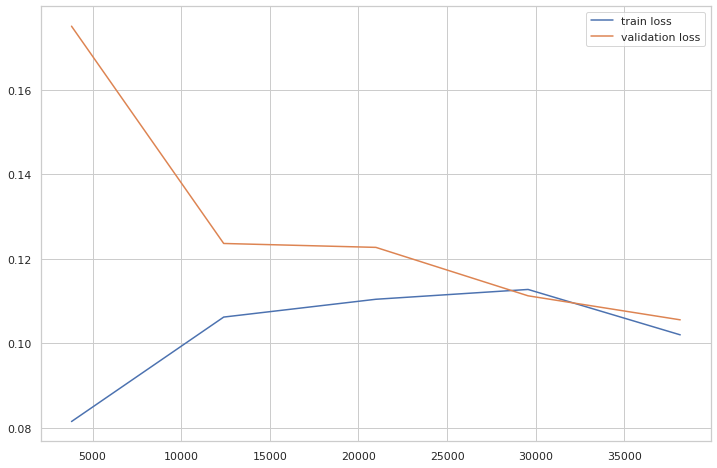

In [ ]:
from sklearn.tree import DecisionTreeClassifier
evaluation(DecisionTreeClassifier(max_depth=5, min_samples_split=2, min_samples_leaf=1))